In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import pyccl
import math
import os
from numpy import diff

import sys
sys.path.append("./simulation_code/")
from simulate_des_maps import *

from coefficient import * 

os.environ["PATH"]='/home/ngrewal/flask/flask/bin:'+os.environ["PATH"]

### 5 cosmological parameters and 5 galaxy biases


(maybe try w dark energy equation of state)

In this notebook I will study a range of values for each variable by comparing the resulting simulated maps.

In [22]:
# standard parameter values
omega_b = 0.048
omega_m = 0.3
h = 0.7
n_s = 0.96
sigma_8 = 0.8
b1 = 1.42
b2 = 1.65
b3 = 1.60
b4 = 1.92
b5 = 2.00

cm = ["omega_b","omega_m","h","n_s","sigma_8","b1","b2","b3","b4","b5"]

smoothing = 20 # use 1/6 or 1/3
nside = 256
N = 12*nside**2
map_len = 9         # sum of the number of lensing and clustering redshift bins

In [5]:
%%time 
# testing random seed code to make sure noise is identical in each simulation
# if A = B, then it worked
'''
A = simulate_des_maps_bias(omega_b, omega_m, h, n_s, sigma_8, smoothing, nside, b1, b2, b3, b4, b5)
B = simulate_des_maps_bias(omega_b, omega_m, h, n_s, sigma_8, smoothing, nside, b1, b2, b3, b4, b5)

# compare all 9 maps in each simulation

for i in range(2): 
    if i == 0: # clustering maps
        for j in range(5):
            if (A[i][j]==B[i][j]).all() != True:
                print('The simulations are not identical')
    if i == 1: # lensing maps
        for j in range(4):
            if (A[i][j]==B[i][j]).all() != True:
                print('The simulations are not identical')
'''

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


"\nA = simulate_des_maps_bias(omega_b, omega_m, h, n_s, sigma_8, smoothing, nside, b1, b2, b3, b4, b5)\nB = simulate_des_maps_bias(omega_b, omega_m, h, n_s, sigma_8, smoothing, nside, b1, b2, b3, b4, b5)\n\n# compare all 9 maps in each simulation\n\nfor i in range(2): \n    if i == 0: # clustering maps\n        for j in range(5):\n            if (A[i][j]==B[i][j]).all() != True:\n                print('The simulations are not identical')\n    if i == 1: # lensing maps\n        for j in range(4):\n            if (A[i][j]==B[i][j]).all() != True:\n                print('The simulations are not identical')\n"

In [6]:
# define range for each variable

# number of cosmological parameter values (length of range)
# higher value -> smaller dx
N_cm = 50

def find_range(x):
    y = .01*x
    return np.linspace(x-3*y,x+3*y,N_cm)

omega_b_range = find_range(omega_b)
omega_m_range = find_range(omega_m)
h_range = find_range(h)
n_s_range = find_range(n_s)
sigma_8_range = find_range(sigma_8)
b1_range = find_range(b1)
b2_range = find_range(b2)
b3_range = find_range(b3)
b4_range = find_range(b4)
b5_range = find_range(b5)

In [7]:
# generating 5 clustering and 4 lensing maps for a range of cosmological parameter inputs 

def make_maps(var,var_range):
    
    cmaps = np.zeros((N_cm,5,N)) # clustering maps
    lmaps = np.zeros((N_cm,4,N)) # lensing maps
    if var == omega_b:
        varname = "omega_b"
        for index,value in enumerate(var_range):
            cmaps[index],lmaps[index] = simulate_des_maps_bias(value, omega_m, h, n_s, sigma_8, smoothing, nside, b1, b2, b3, b4, b5)
            
    if var == omega_m:
        varname = "omega_m"
        for index,value in enumerate(var_range):
            cmaps[index],lmaps[index] = simulate_des_maps_bias(omega_b, value, h, n_s, sigma_8, smoothing, nside, b1, b2, b3, b4, b5)
            
    if var == h:
        varname = "h"
        for index,value in enumerate(var_range):
            cmaps[index],lmaps[index] = simulate_des_maps_bias(omega_b, omega_m, value, n_s, sigma_8, smoothing, nside, b1, b2, b3, b4, b5)
            
    if var == n_s:
        varname = "n_s"
        for index,value in enumerate(var_range):
            cmaps[index],lmaps[index] = simulate_des_maps_bias(omega_b, omega_m, h, value, sigma_8, smoothing, nside, b1, b2, b3, b4, b5)   
            
    if var == sigma_8:
        varname = "sigma_8"
        for index,value in enumerate(var_range):
            cmaps[index],lmaps[index] = simulate_des_maps_bias(omega_b, omega_m, h, n_s, value, smoothing, nside, b1, b2, b3, b4, b5)

    if var == b1:
        varname = "b1"
        for index,value in enumerate(var_range):
            cmaps[index],lmaps[index] = simulate_des_maps_bias(omega_b, omega_m, h, n_s, sigma_8, smoothing, nside, value, b2, b3, b4, b5)
    
    if var == b2:
        varname = "b2"
        for index,value in enumerate(var_range):
            cmaps[index],lmaps[index] = simulate_des_maps_bias(omega_b, omega_m, h, n_s, sigma_8, smoothing, nside, b1, value, b3, b4, b5)
    
    if var == b3:
        varname = "b3"
        for index,value in enumerate(var_range):
            cmaps[index],lmaps[index] = simulate_des_maps_bias(omega_b, omega_m, h, n_s, sigma_8, smoothing, nside, b1, b2, value, b4, b5) 
    
    if var == b4:
        varname = "b4"
        for index,value in enumerate(var_range):
            cmaps[index],lmaps[index] = simulate_des_maps_bias(omega_b, omega_m, h, n_s, sigma_8, smoothing, nside, b1, b2, b3, value, b5)

    if var == b5:
        varname = "b5"
        for index,value in enumerate(var_range):
            cmaps[index],lmaps[index] = simulate_des_maps_bias(omega_b, omega_m, h, n_s, sigma_8, smoothing, nside, b1, b2, b3, b4, value)

    #hp.mollview(cmaps[0][0],title='Clustering Map - Mollweide View')

    #hp.mollview(lmaps[0][0],title='Lensing Map - Mollweide View')
    
    path = os.path.join('Simulations')

    np.save(os.path.join(path, f'{varname}_cmaps_{N_cm}'),cmaps)
    np.save(os.path.join(path, f'{varname}_lmaps_{N_cm}'),lmaps)
    
    return cmaps,lmaps


### Simulate Maps

In [ ]:
%%time 

#omega_b_cmaps,omega_b_lmaps = make_maps(omega_b,omega_b_range)
#omega_m_cmaps,omega_m_lmaps = make_maps(omega_m,omega_m_range)
#h_cmaps,h_lmaps = make_maps(h,h_range)
#n_s_cmaps,n_s_lmaps = make_maps(n_s,n_s_range)
#sigma_8_cmaps,sigma_8_lmaps = make_maps(sigma_8,sigma_8_range)
#b1_cmaps,b1_lmaps = make_maps(b1,b1_range)
#b2_cmaps,b2_lmaps = make_maps(b2,b2_range)
#b3_cmaps,b3_lmaps = make_maps(b3,b3_range)
#b4_cmaps,b4_lmaps = make_maps(b4,b4_range)
#b5_cmaps,b5_lmaps = make_maps(b5,b5_range)

In [35]:
def load_maps(varname,N_cm=50):
    path = os.path.join('Simulations')
    cmaps = np.load(os.path.join(path, f'{varname}_cmaps_{N_cm}.npy'))
    lmaps = np.load(os.path.join(path, f'{varname}_lmaps_{N_cm}.npy'))
    return cmaps,lmaps
    

#omega_b_cmaps,omega_b_lmaps = load_maps("omega_b")
#omega_m_cmaps,omega_m_lmaps = load_maps("omega_m")
#h_cmaps,h_lmaps = load_maps("h")
n_s_cmaps,n_s_lmaps = load_maps("n_s")
#sigma_8_cmaps,sigma_8_lmaps = load_maps("sigma_8")
#b1_cmaps,b1_lmaps = load_maps("b1")
#b2_cmaps,b2_lmaps = load_maps("b2")
#b3_cmaps,b3_lmaps = load_maps("b3")
#b4_cmaps,b4_lmaps = load_maps("b4")
#b5_cmaps,b5_lmaps = load_maps("b5")


---

### Calculating MFs

In [36]:
thr_ct = 10  
N = 12*nside**2

# find MFs of clustering and lensing maps for a range of cosmological parameter values
def find_mf(cmaps,lmaps):
    v = np.zeros((N_cm,map_len,thr_ct))
    v0 = np.zeros((N_cm,map_len,thr_ct))
    v1 = np.zeros((N_cm,map_len,thr_ct))
    v2 = np.zeros((N_cm,map_len,thr_ct))
    for i in range(N_cm):
        v[i],v0[i],v1[i],v2[i] = calc_mf_2maps(cmaps[i],lmaps[i],thr_ct,N)   
    return v,v0,v1,v2

#omega_b_v,omega_b_v0,omega_b_v1,omega_b_v2 = find_mf(omega_m_cmaps,omega_m_lmaps)
#omega_m_v,omega_m_v0,omega_m_v1,omega_m_v2 = find_mf(omega_m_cmaps,omega_m_lmaps)
#h_v,h_v0,h_v1,h_v2 = find_mf(omega_m_cmaps,omega_m_lmaps)
n_s_v,n_s_v0,n_s_v1,n_s_v2 = find_mf(omega_m_cmaps,omega_m_lmaps)
#sigma_8_v,sigma_8_v0,sigma_8_v1,sigma_8_v2 = find_mf(omega_m_cmaps,omega_m_lmaps)
#b1_v,b1_v0,b1_v1,b1_v2 = find_mf(omega_m_cmaps,omega_m_lmaps)
#b2_v,b2_v0,b2_v1,b2_v2 = find_mf(omega_m_cmaps,omega_m_lmaps)
#b3_v,b3_v0,b3_v1,b3_v2 = find_mf(omega_m_cmaps,omega_m_lmaps)
#b4_v,b4_v0,b4_v1,b4_v2 = find_mf(omega_m_cmaps,omega_m_lmaps)
#b5_v,b5_v0,b5_v1,b5_v2 = find_mf(omega_m_cmaps,omega_m_lmaps)

### Find gradients of MFs using 2 points

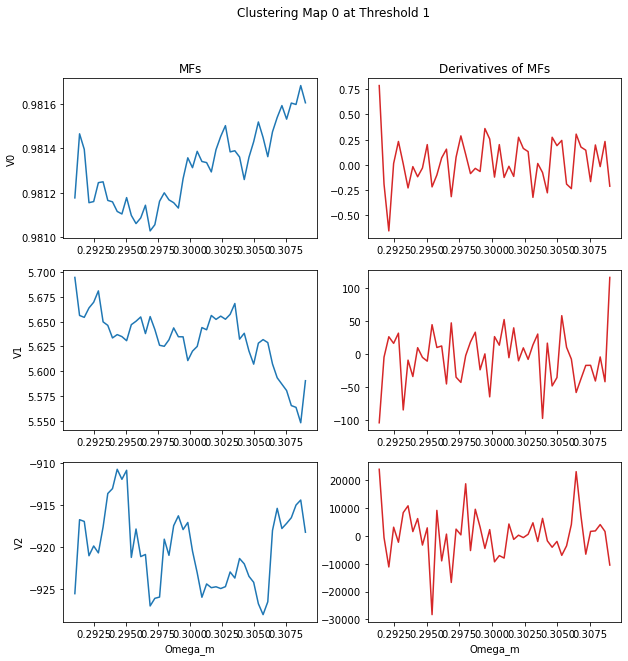

In [40]:
t_val = 1      # threshold value
map_num = 0      # map number (0-4 for clustering map, 5-8 for lensing)
map_array = ['Clustering','Clustering','Clustering','Clustering','Clustering','Lensing','Lensing','Lensing','Lensing']

# find slope in between omega_b values
d_v0 = diff(omega_m_v0[:,0,t_val])/diff(omega_m_range)
d_v1 = diff(omega_m_v1[:,0,t_val])/diff(omega_m_range)
d_v2 = diff(omega_m_v2[:,0,t_val])/diff(omega_m_range)

# plot MFs and derivatives
fig, ((ax1, ax2),(ax3,ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(10,10))
fig.suptitle(f'{map_array[map_num]} Map {map_num} at Threshold {t_val}')
ax1.plot(omega_m_range,omega_m_v0[:,map_num,t_val])
ax1.set_ylabel('V0')
ax1.set_title('MFs')
ax3.plot(omega_m_range,omega_m_v1[:,map_num,t_val])
ax3.set_ylabel('V1')
ax5.plot(omega_m_range,omega_m_v2[:,map_num,t_val])
ax5.set_xlabel('Omega_m')
ax5.set_ylabel('V2')
ax2.plot(omega_m_range[1:],d_v0, 'tab:red')
ax2.set_title('Derivatives of MFs')
ax4.plot(omega_m_range[1:],d_v1, 'tab:red')
ax6.plot(omega_m_range[1:],d_v2, 'tab:red')
ax6.set_xlabel('Omega_m');

#for ax in fig.get_axes():
#    ax.label_outer()

### Find Gradients of MFs using n points

In [14]:
# fit a line within a width (using a few points around) to find the gradient

def line_slope(b,range_cm,mf):
    '''
    Input: number of points used to build line (must be greater than 1)
    Output: array of slopes at each point
    '''
    slope = np.zeros(N_cm-1)  # slope between different cm values (minus one)
    a=0
    for i in range(N_cm-1):
        slope[i],c = np.polyfit(range_cm[a:b],mf[:,map_num,t_val][a:b],deg=1)
        a += 1
        b += 1
    return slope  

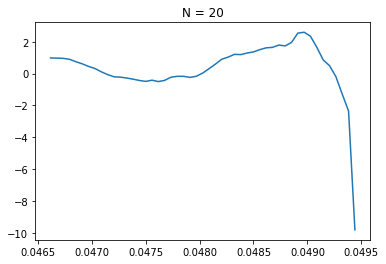

In [32]:
# use 20 for n
n = 20
plt.plot(omega_b_range[1:],line_slope(n,omega_b_range,omega_b_v0))
plt.title(f'N = {n}');

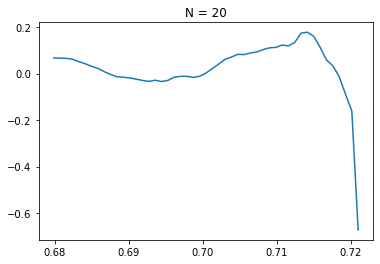

In [31]:
# use 20 for n
n = 20
plt.plot(h_range[1:],line_slope(n,h_range,h_v0))
plt.title(f'N = {n}');

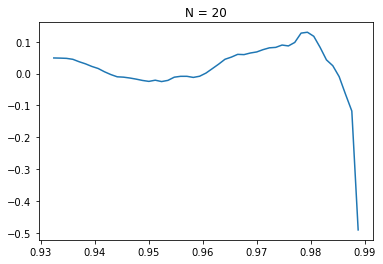

In [37]:
# use 20 for n
n = 20
plt.plot(n_s_range[1:],line_slope(n,n_s_range,n_s_v0))
plt.title(f'N = {n}');

### Analysis of Range Size used to Build Line

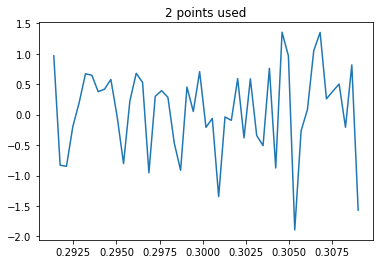

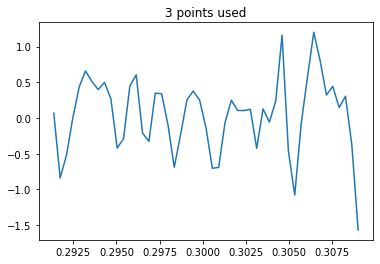

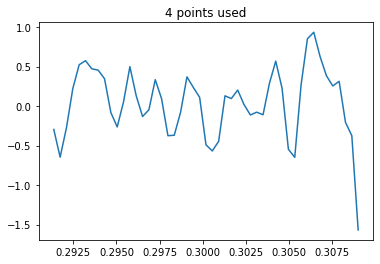

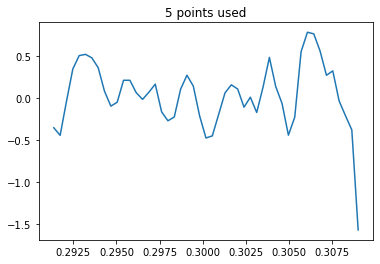

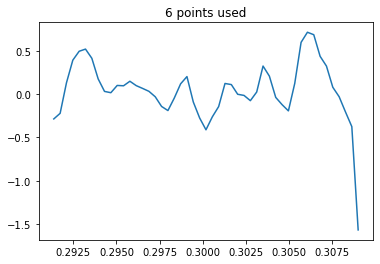

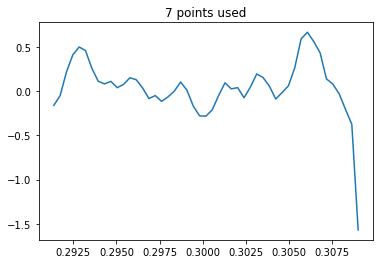

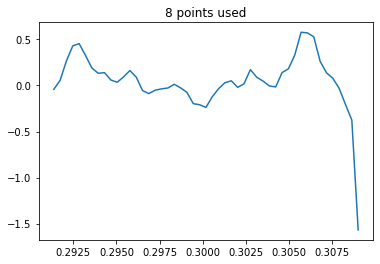

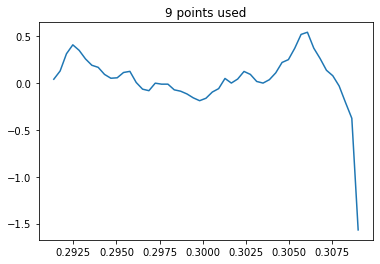

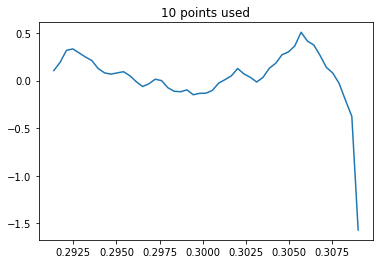

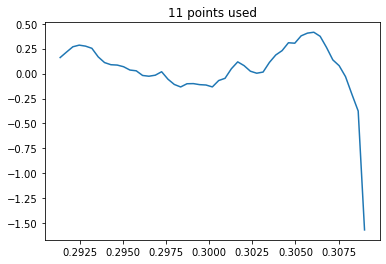

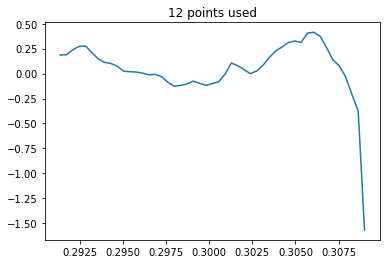

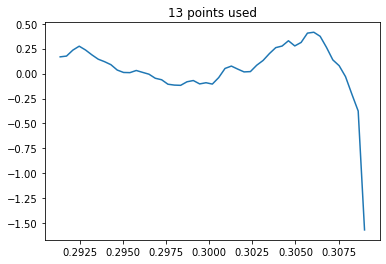

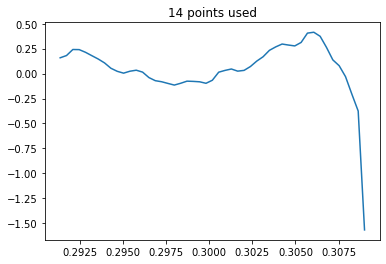

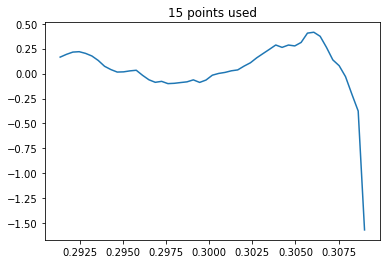

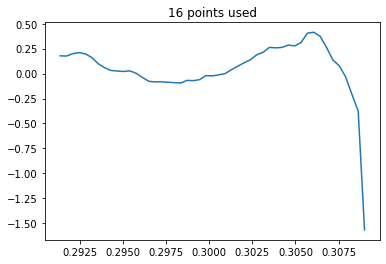

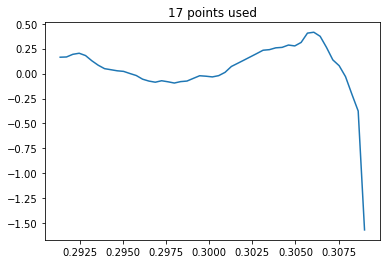

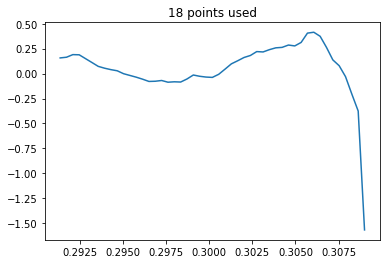

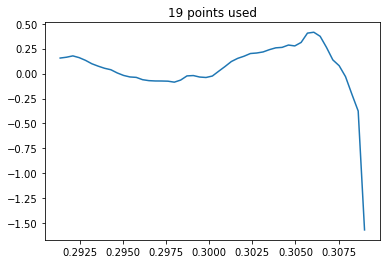

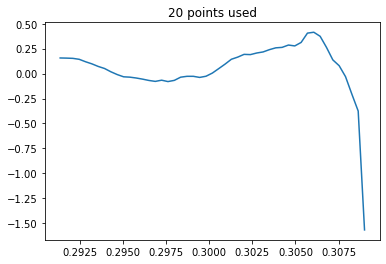

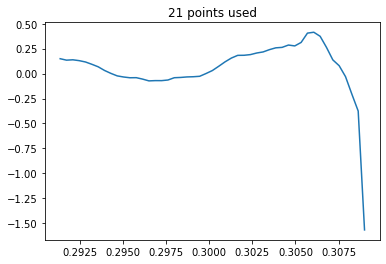

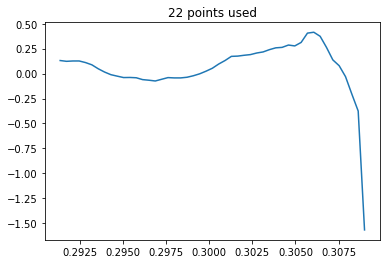

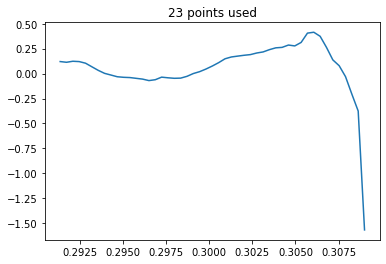

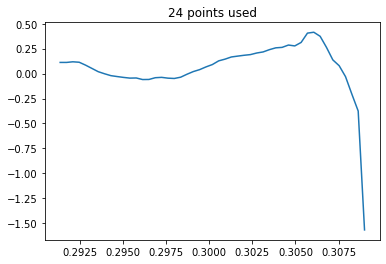

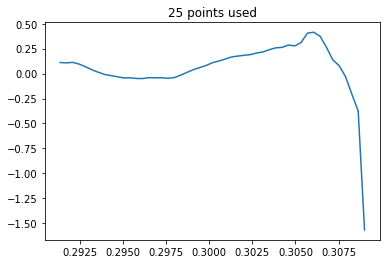

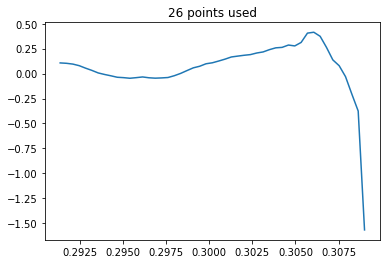

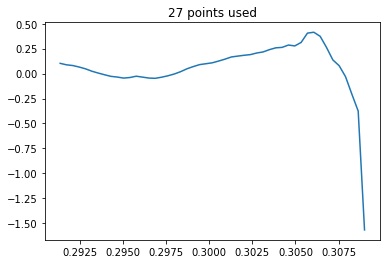

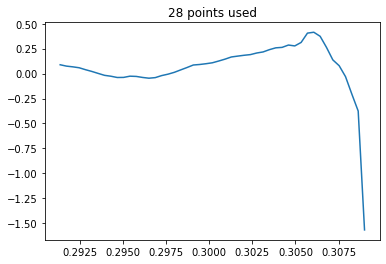

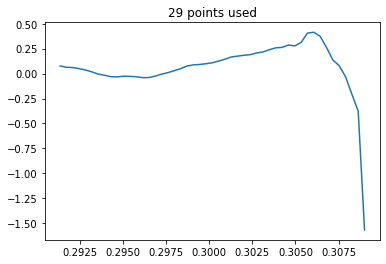

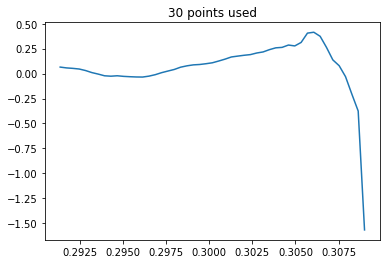

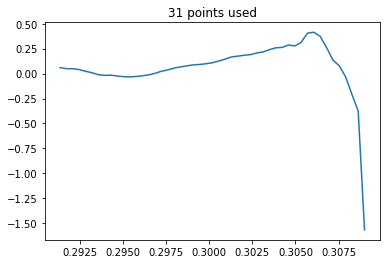

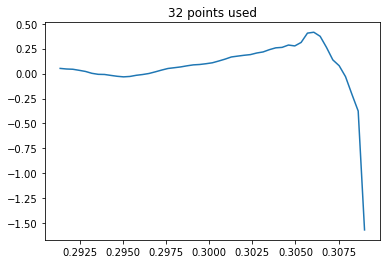

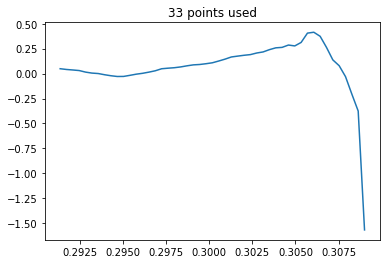

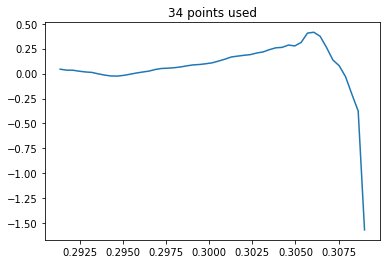

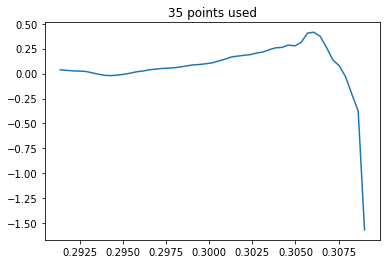

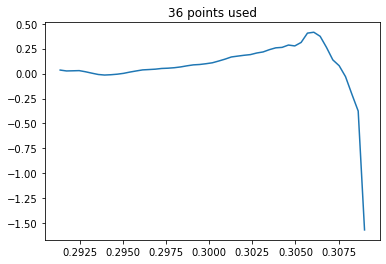

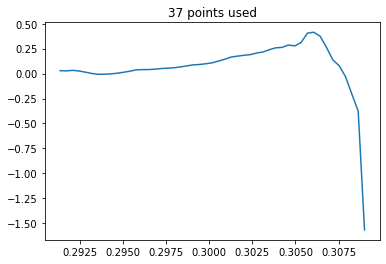

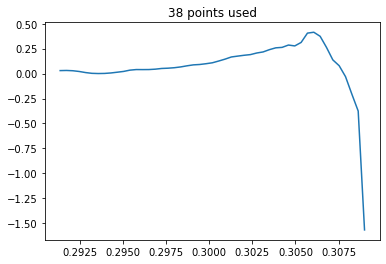

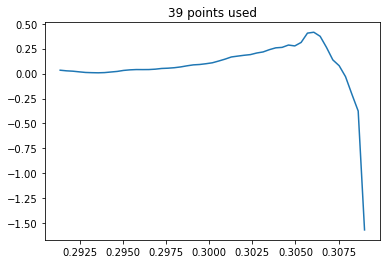

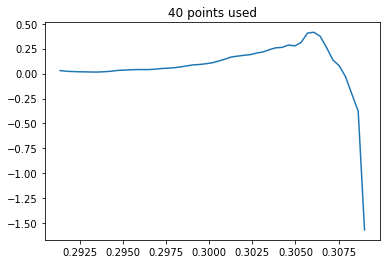

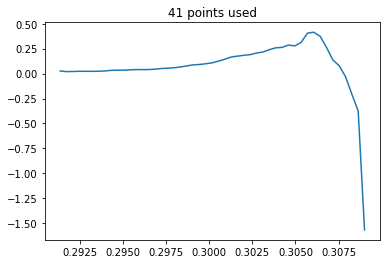

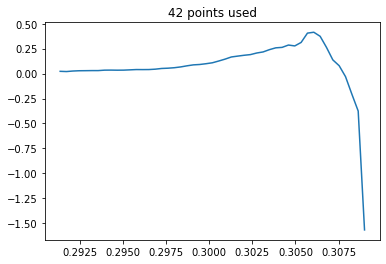

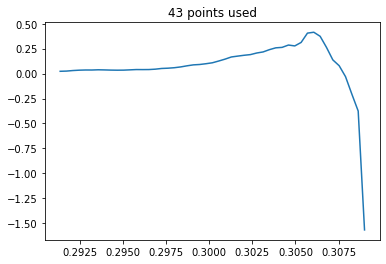

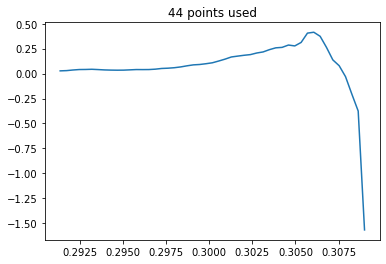

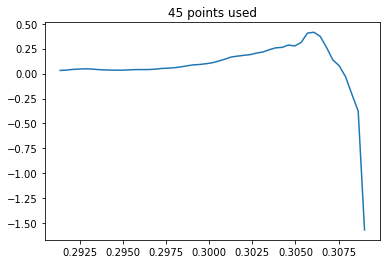

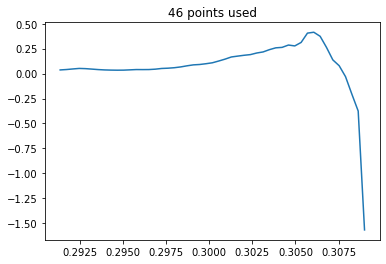

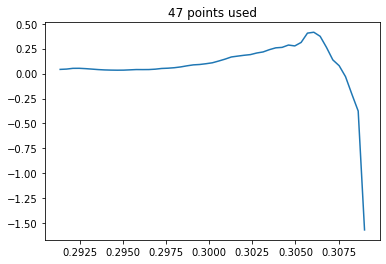

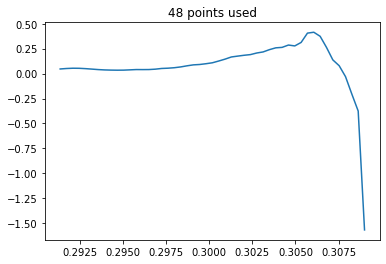

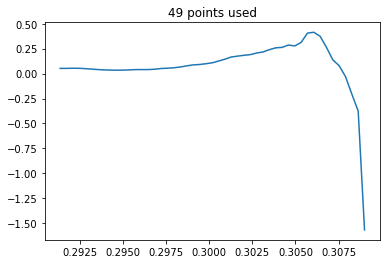

In [15]:
# plot gradients for different range sizes
for i in range(2,N_cm):
    plt.plot(omega_m_range[1:],line_slope(i,omega_m_range,omega_m_v0))  # skip the first omega_m value
    plt.title(f'{i} points used')
    plt.show();

In [ ]:
# manually find derivatives with respect omega_m
# only want gradient around fiducial value
# experiment with smaller range (more threshold counts)
# should be a straight line
# needs to work for all maps, thresholds
# optimise for each cosmological parameter



In [ ]:

    
    
diff(omega_m_range)/diff(omega_m_v0[:,0,t_val])
d_v1,c = diff(omega_m_range)/diff(omega_m_v1[:,0,t_val])
d_v2,c = diff(omega_m_range)/diff(omega_m_v2[:,0,t_val])

# plot MFs and derivatives
fig, ((ax1, ax2),(ax3,ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(10,10))
fig.suptitle(f'{map_array[map_num]} Map {map_num} at Threshold {t_val}')
ax1.plot(omega_m_range,omega_m_v0[:,map_num,t_val])
ax1.set_ylabel('V0')
ax1.set_title('MFs')
ax3.plot(omega_m_range,omega_m_v1[:,map_num,t_val])
ax3.set_ylabel('V1')
ax5.plot(omega_m_range,omega_m_v2[:,map_num,t_val])
ax5.set_xlabel('Omega_m')
ax5.set_ylabel('V2')
ax2.plot(omega_m_range[1:],d_v0, 'tab:red')
ax2.set_title('Derivatives of MFs')
ax4.plot(omega_m_range[1:],d_v1, 'tab:red')
ax6.plot(omega_m_range[1:],d_v2, 'tab:red')
ax6.set_xlabel('Omega_m');

#for ax in fig.get_axes():
#    ax.label_outer()

In [ ]:
omega_m_v,omega_m_v0,omega_m_v1,omega_m_v2 = find_mf(omega_m_cmaps,omega_m_lmaps)
plt.plot(omega_m_v[0][0],omega_m_v0[0][0]);
print('omega_m is:',min(omega_m_range),'and this is the first clustering map')